# kNN基础

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.6791791101],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
              ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [4]:
# 初始化训练数据集
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

NameError: name 'np' is not defined

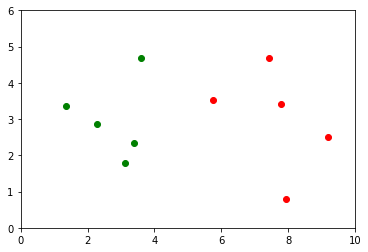

In [60]:
# 绘制训练数据集的散点图
# X_train[y_train == 0, 0] 取样本结果是 0 的 x 坐标值
# X_train[y_train == 0, 1] 取样本结果是 0 的 y 坐标值
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='g')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='r')
plt.axis([0, 10, 0, 6])
plt.show()

In [33]:
# 假如现在有一个点如下，那么下面的点用 kNN算法得到的结果应该是什么呢，我先用蓝色的点显示看下
x = np.array([8.093607318, 3.365731514])

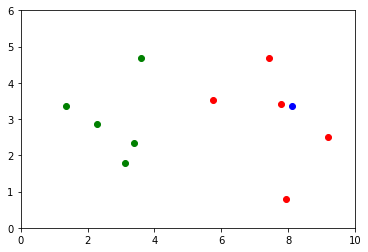

In [52]:
# 通过下图可以看出新的点应该属于蓝色
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='g')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.axis([0, 10, 0, 6])
plt.show()

## kNN的过程

In [37]:
# 先计算新的点和现有点的距离
# 通过欧拉距离公式计算距离
from math import sqrt

distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.698626614439023,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [36]:
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.698626614439023,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [39]:
# 对距离排序，但是要返回排序后的索引，这种时候用到了 argsort
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [40]:
# 这时候，如果我们定义 k， 取top k 的
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [42]:
from collections import Counter

votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [43]:
votes.most_common(1)

[(1, 5)]